In [1]:
# !pip install jupyterthemes
!jt -t grade3
# !jt -t chesterish
import pandas as pd
import numpy as np

import re
import string
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
# import xlrd
import collections
import openpyxl
%matplotlib inline

In [2]:
df1=pd.read_excel("Data.xlsx",sheet_name="Code")
df=pd.read_excel("Data.xlsx",sheet_name="456")
df2=pd.read_excel("Data.xlsx",sheet_name="Inc-LHE")
df3=pd.read_excel("Data.xlsx",sheet_name="Inc-Deq")
df4=pd.read_excel("Data.xlsx",sheet_name="456")
df5=pd.read_excel("Data.xlsx",sheet_name="Inc-Met")
# df1.head()

In [3]:
df=df.dropna()
df = df[df["Pivotal Event 1"] != 0]
df.head(3)

,Month,Date,time,Time,Quarter,Hazardous Element,IE,Pivotal Event 1,Incident,Target,Threat,RCS1,RCS2,RCS3
0,April,2016-04-28,16:10:00,28-04-2016 16:10,Q1,HE1,Eq,Dev,Deq,Human\nProperty,Injury\nProperty damage,IM,IM,IM
1,April,2016-04-27,16:35:00,27-04-2016 16:35,Q1,HE2,H,Oth,Met,Human\nProperty,Injury\nProperty damage,OP,SC,SC
2,April,2016-04-08,05:50:00,08-04-2016 05:50,Q1,HE3,H,Mov,LHE,Human\nProperty,Injury\nProperty damage,SC,SC,SC


In [4]:
from dateutil import parser
df['time_stamp'] = df['Time'].map(parser.parse)
df['event_year'] = df['time_stamp'].map(lambda x: x.year)
df['event_month'] = df['time_stamp'].map(lambda x: x.month)
df['event_weekday'] = df['time_stamp'].map(lambda x: x.dayofweek)

In [5]:
df.IE.describe()

count     443
unique      4
top        Eq
freq      288
Name: IE, dtype: object

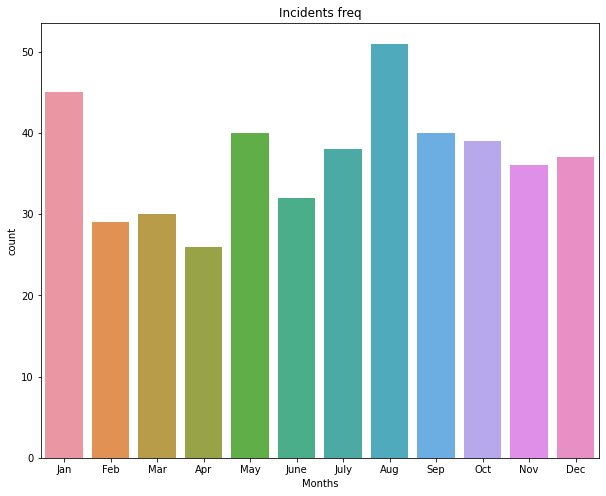

In [6]:
data = """
Mon Tue Wed Thur Fri Sat Sun
"""
x = [0,1,2,3,4,5,6,7,8,9,10,11]
labels = ['Jan', 'Feb', 'Mar', 'Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
  
weeks = data.split()
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["event_month"])
plt.title("Incidents freq")
plt.xlabel("Months")
plt.xticks(x,labels)
plt.show()

In [7]:
df.head(2)

,Month,Date,time,Time,Quarter,Hazardous Element,IE,Pivotal Event 1,Incident,Target,Threat,RCS1,RCS2,RCS3,time_stamp,event_year,event_month,event_weekday
0,April,2016-04-28,16:10:00,28-04-2016 16:10,Q1,HE1,Eq,Dev,Deq,Human\nProperty,Injury\nProperty damage,IM,IM,IM,2016-04-28 16:10:00,2016,4,3
1,April,2016-04-27,16:35:00,27-04-2016 16:35,Q1,HE2,H,Oth,Met,Human\nProperty,Injury\nProperty damage,OP,SC,SC,2016-04-27 16:35:00,2016,4,2


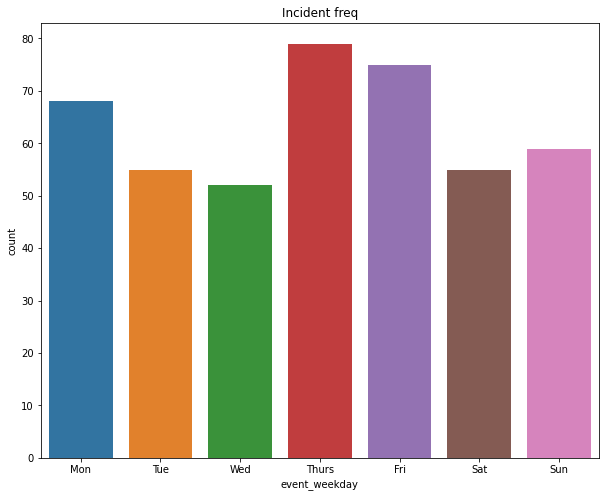

In [8]:
data = """
Mon Tue Wed Thur Fri Sat Sun
"""
x = [0,1,2,3,4,5,6]
labels = ['Mon', 'Tue', 'Wed', 'Thurs','Fri','Sat','Sun']
  
weeks = data.split()
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["event_weekday"])
plt.title("Incident freq")
plt.xticks(x,labels)
plt.show()

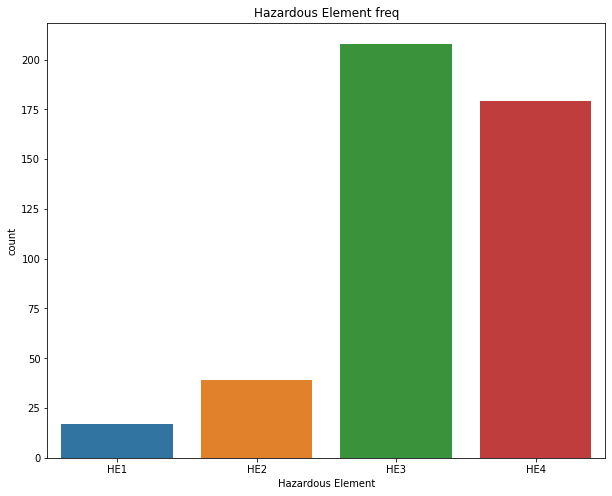

In [9]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["Hazardous Element"])
plt.title("Hazardous Element freq")
plt.show()

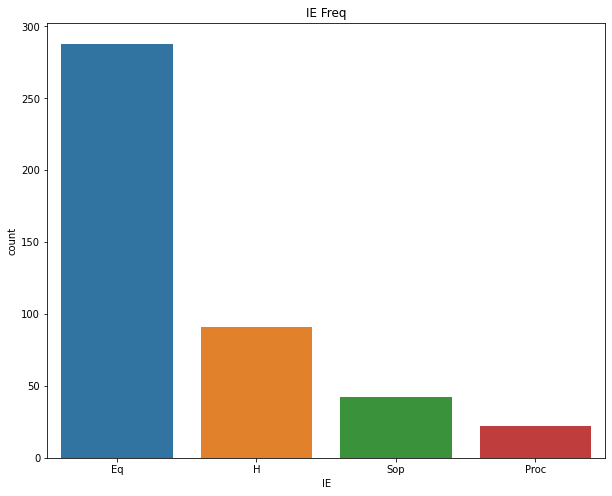

In [10]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["IE"])
plt.title("IE Freq")
plt.show()

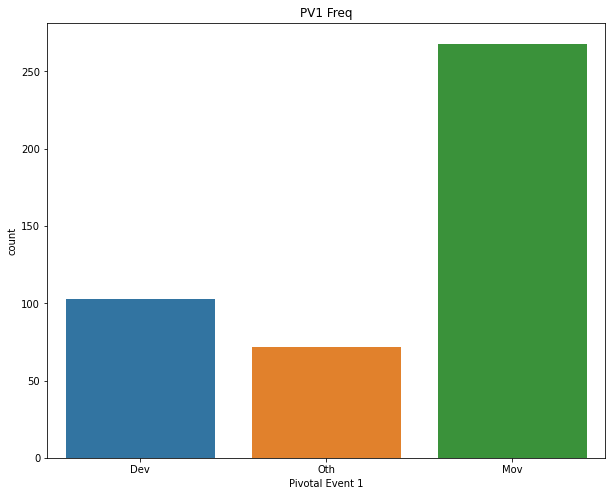

In [11]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["Pivotal Event 1"])
plt.title("PV1 Freq")
plt.show()

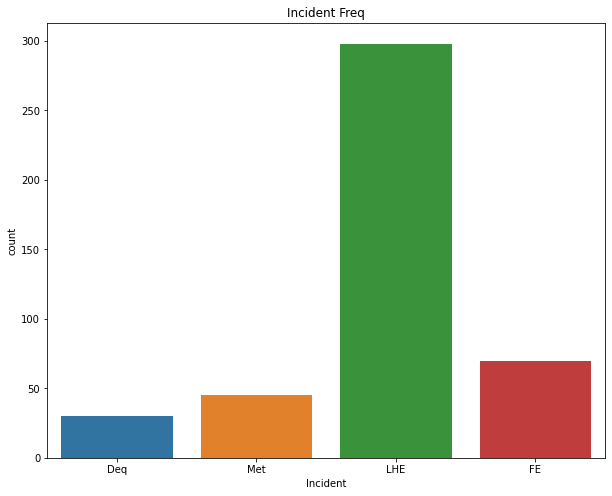

In [12]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["Incident"])
plt.title("Incident Freq")
plt.show()


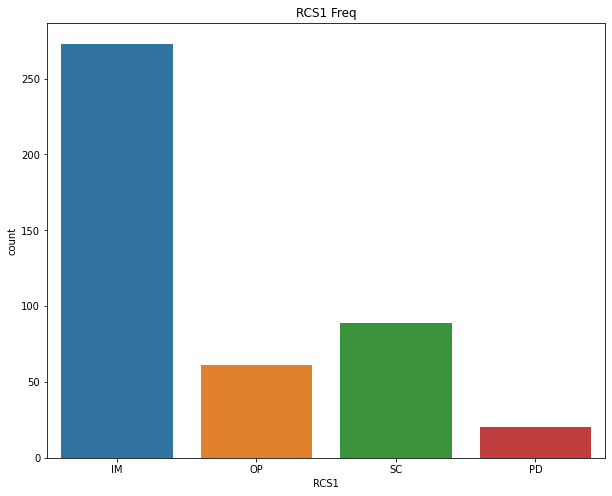

In [13]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["RCS1"])
plt.title("RCS1 Freq")
plt.show()


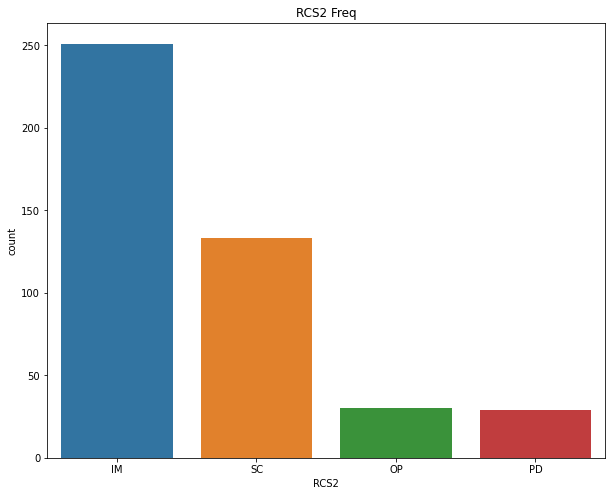

In [14]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["RCS2"])
plt.title("RCS2 Freq")
plt.show()


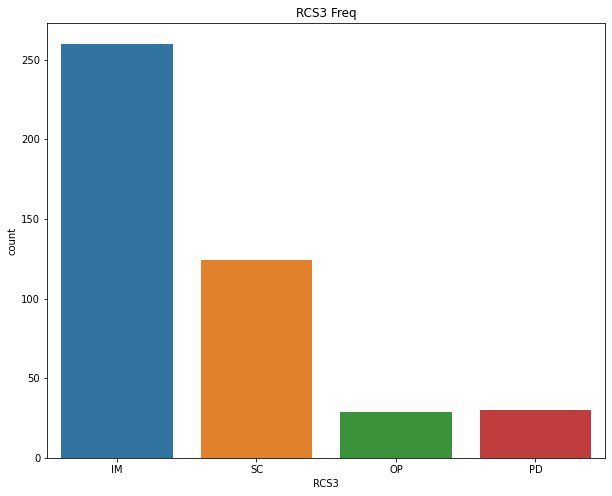

In [15]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["RCS3"])
plt.title("RCS3 Freq")
plt.show()


In [16]:
df.head(3)

,Month,Date,time,Time,Quarter,Hazardous Element,IE,Pivotal Event 1,Incident,Target,Threat,RCS1,RCS2,RCS3,time_stamp,event_year,event_month,event_weekday
0,April,2016-04-28,16:10:00,28-04-2016 16:10,Q1,HE1,Eq,Dev,Deq,Human\nProperty,Injury\nProperty damage,IM,IM,IM,2016-04-28 16:10:00,2016,4,3
1,April,2016-04-27,16:35:00,27-04-2016 16:35,Q1,HE2,H,Oth,Met,Human\nProperty,Injury\nProperty damage,OP,SC,SC,2016-04-27 16:35:00,2016,4,2
2,April,2016-04-08,05:50:00,08-04-2016 05:50,Q1,HE3,H,Mov,LHE,Human\nProperty,Injury\nProperty damage,SC,SC,SC,2016-08-04 05:50:00,2016,8,3


In [17]:
df2=pd.DataFrame()
df2=df[['Hazardous Element','RCS1']]
# df2=df[['Hazardous Element','IE','Pivotal Event 1','RCS1','RCS3','RCS3']]
df2

,Hazardous Element,RCS1
0,HE1,IM
1,HE2,OP
2,HE3,SC
3,HE3,IM
4,HE4,OP
...,...,...
450,HE2,SC
451,HE2,SC
452,HE3,IM
453,HE3,IM


In [18]:
data=list(df2.values)

In [19]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(df2.values).transform(df2.values)
df3=pd.DataFrame(te_ary,columns=te.columns_)
df3

,HE1,HE2,HE3,HE4,IM,OP,PD,SC
0,True,False,False,False,True,False,False,False
1,False,True,False,False,False,True,False,False
2,False,False,True,False,False,False,False,True
3,False,False,True,False,True,False,False,False
4,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...
438,False,True,False,False,False,False,False,True
439,False,True,False,False,False,False,False,True
440,False,False,True,False,True,False,False,False
441,False,False,True,False,True,False,False,False


In [20]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df3,min_support=0.0000000001,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.038375,(HE1)
1,0.088036,(HE2)
2,0.469526,(HE3)
3,0.404063,(HE4)
4,0.616253,(IM)
5,0.137698,(OP)
6,0.045147,(PD)
7,0.200903,(SC)
8,0.027088,"(HE1, IM)"
9,0.011287,"(HE1, SC)"


In [21]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.0000000001)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HE1),(IM),0.038375,0.616253,0.027088,0.705882,1.145443,0.003440,1.304740
1,(IM),(HE1),0.616253,0.038375,0.027088,0.043956,1.145443,0.003440,1.005838
2,(HE1),(SC),0.038375,0.200903,0.011287,0.294118,1.463979,0.003577,1.132054
3,(SC),(HE1),0.200903,0.038375,0.011287,0.056180,1.463979,0.003577,1.018865
4,(HE2),(IM),0.088036,0.616253,0.020316,0.230769,0.374472,-0.033936,0.498871
5,(IM),(HE2),0.616253,0.088036,0.020316,0.032967,0.374472,-0.033936,0.943054
6,(OP),(HE2),0.137698,0.088036,0.018059,0.131148,1.489702,0.005936,1.049619
7,(HE2),(OP),0.088036,0.137698,0.018059,0.205128,1.489702,0.005936,1.084832
8,(SC),(HE2),0.200903,0.088036,0.049661,0.247191,2.807836,0.031975,1.211415
9,(HE2),(SC),0.088036,0.200903,0.049661,0.564103,2.807836,0.031975,1.833223


In [22]:
res2=res[['antecedents','consequents','support','confidence','lift']]
res2

,antecedents,consequents,support,confidence,lift
0,(HE1),(IM),0.027088,0.705882,1.145443
1,(IM),(HE1),0.027088,0.043956,1.145443
2,(HE1),(SC),0.011287,0.294118,1.463979
3,(SC),(HE1),0.011287,0.056180,1.463979
4,(HE2),(IM),0.020316,0.230769,0.374472
5,(IM),(HE2),0.020316,0.032967,0.374472
6,(OP),(HE2),0.018059,0.131148,1.489702
7,(HE2),(OP),0.018059,0.205128,1.489702
8,(SC),(HE2),0.049661,0.247191,2.807836
9,(HE2),(SC),0.049661,0.564103,2.807836


In [60]:
# res2=res1[res1['confidence']>=1]
# res2

In [61]:
res2=res2[res2['lift']>=1]
res2

,antecedents,consequents,support,confidence,lift
0,(HE1),(IM),0.027088,0.705882,1.145443
1,(IM),(HE1),0.027088,0.043956,1.145443
2,(HE1),(SC),0.011287,0.294118,1.463979
3,(SC),(HE1),0.011287,0.056180,1.463979
6,(HE2),(OP),0.018059,0.205128,1.489702
7,(OP),(HE2),0.018059,0.131148,1.489702
8,(HE2),(SC),0.049661,0.564103,2.807836
9,(SC),(HE2),0.049661,0.247191,2.807836
12,(HE3),(OP),0.076749,0.163462,1.187106
13,(OP),(HE3),0.076749,0.557377,1.187106


In [62]:
# res2=res2.drop[res2.index%2==1]
res2.drop(res2[res2.index%2 == '0'].index)

,antecedents,consequents,support,confidence,lift
0,(HE1),(IM),0.027088,0.705882,1.145443
1,(IM),(HE1),0.027088,0.043956,1.145443
2,(HE1),(SC),0.011287,0.294118,1.463979
3,(SC),(HE1),0.011287,0.056180,1.463979
6,(HE2),(OP),0.018059,0.205128,1.489702
7,(OP),(HE2),0.018059,0.131148,1.489702
8,(HE2),(SC),0.049661,0.564103,2.807836
9,(SC),(HE2),0.049661,0.247191,2.807836
12,(HE3),(OP),0.076749,0.163462,1.187106
13,(OP),(HE3),0.076749,0.557377,1.187106


In [63]:
res2
res2.to_excel("rcs1.xlsx")

In [65]:
df2=pd.DataFrame()
df2=df[['Hazardous Element','IE','RCS2']]
# df2=df[['Hazardous Element','IE','Pivotal Event 1','RCS1','RCS3','RCS3']]
df2

,Hazardous Element,IE,RCS2
0,HE1,Eq,IM
1,HE2,H,SC
2,HE3,H,SC
3,HE3,Eq,IM
4,HE4,Sop,OP
...,...,...,...
450,HE2,H,SC
451,HE2,H,SC
452,HE3,Eq,IM
453,HE3,Eq,SC


In [66]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(df2.values).transform(df2.values)
df3=pd.DataFrame(te_ary,columns=te.columns_)
# df3
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df3,min_support=0.000001,use_colnames=True)
# frequent_itemsets=apriori(df3,use_colnames=True)
frequent_itemsets



,support,itemsets
0,0.650113,(Eq)
1,0.205418,(H)
2,0.038375,(HE1)
3,0.088036,(HE2)
4,0.469526,(HE3)
...,...,...
84,0.002257,"(IM, Proc, HE4)"
85,0.002257,"(IM, Sop, HE4)"
86,0.006772,"(Sop, HE4, OP)"
87,0.004515,"(Proc, HE4, PD)"


In [67]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.0000000001)
# res
res2=res[['antecedents','consequents','support','confidence','lift']]
# res2
res2=res2[res2['lift']>=1]
res2

,antecedents,consequents,support,confidence,lift
0,(HE1),(Eq),0.027088,0.705882,1.085784
1,(Eq),(HE1),0.027088,0.041667,1.085784
6,(Eq),(HE4),0.329571,0.506944,1.254617
7,(HE4),(Eq),0.329571,0.815642,1.254617
8,(IM),(Eq),0.553047,0.976096,1.501425
...,...,...,...,...,...
283,(PD),"(Proc, HE4)",0.004515,0.068966,10.183908
284,"(Sop, HE4)",(SC),0.015801,0.636364,2.119617
286,"(HE4, SC)",(Sop),0.015801,0.259259,2.734568
287,(Sop),"(HE4, SC)",0.015801,0.166667,2.734568


In [68]:
type(res2.antecedents[1])
# for i in 
res2 = res2[res2['antecedents'].apply(len) == 2]
res2 = res2[res2['consequents'].apply(len) == 1]
# res2 = res2[res2['antecedents'].apply(len) >= 2]
res2

,antecedents,consequents,support,confidence,lift
86,"(HE1, Eq)",(IM),0.027088,1.000000,1.764940
87,"(HE1, IM)",(Eq),0.027088,1.000000,1.538194
88,"(IM, Eq)",(HE1),0.027088,0.048980,1.276351
93,"(IM, HE2)",(Eq),0.018059,0.888889,1.367284
94,"(Eq, HE2)",(IM),0.018059,0.888889,1.568836
...,...,...,...,...,...
274,"(HE4, OP)",(Sop),0.006772,0.375000,3.955357
278,"(Proc, HE4)",(PD),0.004515,0.666667,10.183908
280,"(HE4, PD)",(Proc),0.004515,0.153846,3.097902
284,"(Sop, HE4)",(SC),0.015801,0.636364,2.119617


In [69]:

a1=frozenset({'IM'})
a2=frozenset({'Co'})
a3=frozenset({'OP'})
a4=frozenset({'SC'})
a5=frozenset({'PTW'})
res3= res2[ (res2['consequents'] == a1)|(res2['consequents'] == a2)|(res2['consequents'] == a3)|(res2['consequents'] == a4)|(res2['consequents'] == a5)]
res3.to_excel("rcs2.xlsx")
res3
# OP
# PD
# SC
# PTW

,antecedents,consequents,support,confidence,lift
86,"(HE1, Eq)",(IM),0.027088,1.000000,1.764940
94,"(Eq, HE2)",(IM),0.018059,0.888889,1.568836
106,"(Eq, HE3)",(IM),0.221219,0.809917,1.429456
110,"(Eq, HE3)",(OP),0.020316,0.074380,1.098347
130,"(Eq, HE4)",(IM),0.286682,0.869863,1.535256
153,"(HE1, H)",(SC),0.011287,1.000000,3.330827
172,"(HE2, H)",(SC),0.051919,0.920000,3.064361
184,"(HE3, H)",(SC),0.092551,0.976190,3.251522
202,"(HE4, H)",(SC),0.036117,0.842105,2.804907
206,"(Sop, HE2)",(OP),0.002257,0.200000,2.953333


In [70]:
df2=pd.DataFrame()
df2=df[['Hazardous Element','IE','Pivotal Event 1','RCS3']]
# df2=df[['Hazardous Element','IE','Pivotal Event 1','RCS1','RCS3','RCS3']]
# df2
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(df2.values).transform(df2.values)
df3=pd.DataFrame(te_ary,columns=te.columns_)
# df3



from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df3,min_support=0.00001,use_colnames=True)
# frequent_itemsets=apriori(df3,use_colnames=True)
frequent_itemsets




from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.00001)
# res
res2=res[['antecedents','consequents','support','confidence','lift']]
# res2
res2=res2[res2['lift']>=1]
res2



# type(res2.antecedents[1])
# for i in 
res2 = res2[res2['antecedents'].apply(len) == 3]
res2 = res2[res2['consequents'].apply(len) == 1]
# res2 = res2[res2['antecedents'].apply(len) >= 2]
res2





a1=frozenset({'IM'})
a2=frozenset({'Co'})
a3=frozenset({'OP'})
a4=frozenset({'SC'})
a5=frozenset({'PTW'})
res3= res2[ (res2['consequents'] == a1)|(res2['consequents'] == a2)|(res2['consequents'] == a3)|(res2['consequents'] == a4)|(res2['consequents'] == a5)]
res3.to_excel("rcs3.xlsx")
res3

,antecedents,consequents,support,confidence,lift
992,"(HE1, Dev, Eq)",(IM),0.022573,1.000000,1.703846
1009,"(Dev, Eq, HE2)",(IM),0.006772,1.000000,1.703846
1023,"(Dev, Eq, HE3)",(IM),0.056433,0.961538,1.638314
1051,"(Dev, Eq, HE4)",(IM),0.060948,0.843750,1.437620
1091,"(HE1, Dev, H)",(SC),0.006772,1.000000,3.572581
1118,"(Dev, HE2, H)",(OP),0.002257,0.090909,1.388715
1134,"(Dev, HE2, H)",(SC),0.020316,0.818182,2.923021
1148,"(Dev, HE3, H)",(SC),0.015801,1.000000,3.572581
1162,"(Dev, HE4, H)",(SC),0.004515,1.000000,3.572581
1174,"(Dev, Sop, HE2)",(SC),0.004515,1.000000,3.572581
